In [4]:
# importing relevent library
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [5]:
# loading the data
car = pd.read_csv('Car_cleaned.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


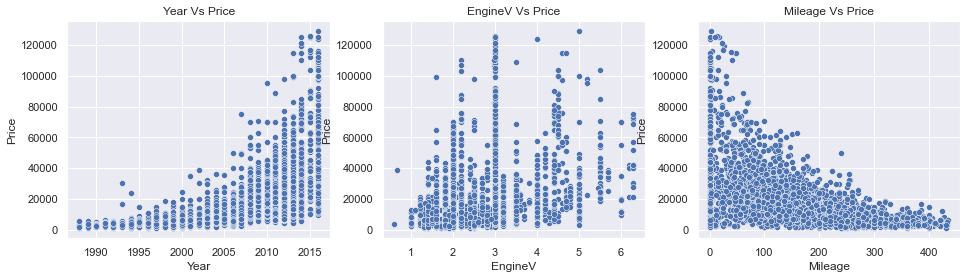

In [ ]:
# vẽ biểu đồ cả ba cột số
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['Price']);
plt.title('Year Vs Price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['Price']);
plt.title('EngineV Vs Price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['Price']);
plt.title('Mileage Vs Price');


####  có thể thấy rằng mối quan hệ này không phải là tuyến tính. KKhông thể chạy `Linear Regression` ở đây.

=> Phải chuyển đổi các cột này

Text(0.5, 1.0, 'Price')

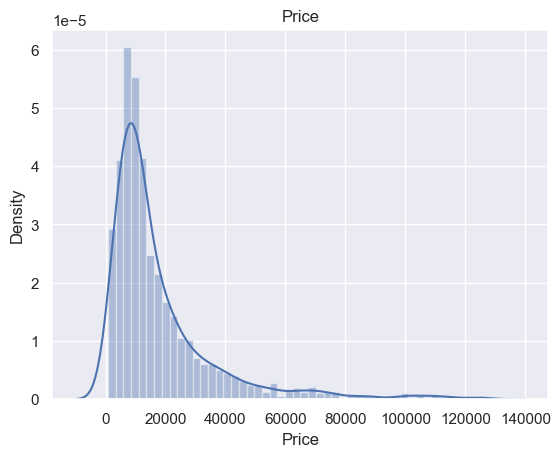

In [10]:
## Checking the price
sns.distplot(car['Price']);
plt.title('Price')

Vấn đề nằm ở giá, giá mà chúng ta có trong dữ liệu không phải là tuyến tính.

cách tiếp cận phổ biến từ nhiều cách khác để chuyển đổi dữ liệu là `log transformation`.

`Numpy` ccó một phương pháp tính logarit tự nhiên là `np.log(x)` trả về logarit tự nhiên của một số hoặc một mảng.

In [7]:
# transfor the price
log_price = np.log(car['Price'])
car['log_price'] = log_price
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


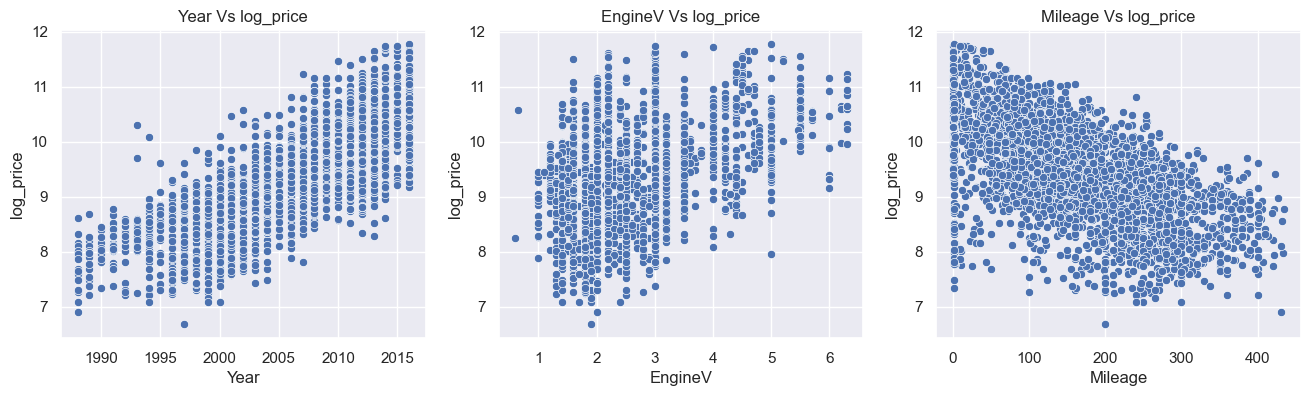

In [9]:
# vẽ lại tất cả ba cột số với giá logarit
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']);
plt.title('Year Vs log_price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']);
plt.title('EngineV Vs log_price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']);
plt.title('Mileage Vs log_price');

### Tuyến tính của dữ liệu với cột Giá


In [10]:
# xóa cột Giá gốc không còn cần thiết
car.drop('Price', axis=1, inplace=True)

###  kiểm tra Đa cộng tuyến.
điều này là đúng khi tính năng của dữ liệu được liên kết với tính năng khác.

In [11]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Có thể có một số hiện tượng đa cộng tuyến trong dữ liệu có thể được giả định như xe càng mới thì số km đã đi sẽ càng thấp. Do đó, `Year` và `Milage`  sẽ có tương quan.

### VIF

In [12]:
# import VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# chỉ lấy cột số vì biến phân loại sẽ được chuyển đổi thành biến giả
var = car[['Mileage', 'Year', 'EngineV']]
# var trở thành một khung dữ liệu chỉ có ba cột


# creating a dataframe
vif_df = pd.DataFrame()

# adding column
vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['features'] = var.columns

# checking the result
vif_df

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Khi có kết quả 1 nghĩa là không có đa cộng tuyến, đây cũng là giá trị nhỏ nhất của phép đo. nhưng nó không có giới hạn trên.

Nhìn chung, các giá trị nằm trong khoảng từ 1 đến 5 hoặc 1< VIF < 5 được coi là ổn, nhưng nó phụ thuộc vào vấn đề trong tay và người phát triển. Người đó sẽ quyết định giá trị cắt bỏ dựa trên kinh nghiệm trước đây của mình.

Từ kết quả tôi có được, có vẻ như cột Năm có quá nhiều mối tương quan với các cột khác. và nó sẽ làm giảm các giá trị tính năng khác. Sẽ tốt hơn nếu giảm cột năm xuống

In [13]:
# drop the year
car.drop('Year', axis=1, inplace=True)

car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## ##  Các cột danh mục

`Brand`, `Body`, `Engine Type` and `Registration`

kiểm tra thông tin về cấu trúc của Data

In [14]:
# checking the datatypes 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


sử dụng phương thức  `pandas` `.get_dummies()` tạo một cột mới cho tất cả các giá trị phân loại

In [15]:
car_dum = pd.get_dummies(car, drop_first=True) 

# checking the data
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [27]:
# Chuyển đổi tất cả các cột boolean sang số nguyên (True -> 1, False -> 0)
car_dum_numeric = car_dum.copy()

# Chuyển đổi các cột boolean
boolean_columns = car_dum.select_dtypes(include=['bool']).columns
car_dum_numeric[boolean_columns] = car_dum_numeric[boolean_columns].astype(int)

# Kiểm tra kiểu dữ liệu sau khi chuyển đổi
print(car_dum_numeric.dtypes)

# Kiểm tra một vài hàng để xác nhận True đã thành 1 và False đã thành 0
print(car_dum_numeric.head())

# Bây giờ tính VIF với dữ liệu đã chuyển đổi
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df_all = pd.DataFrame()
vif_df_all['VIF'] = [vif(car_dum_numeric.values, i) for i in range(car_dum_numeric.shape[1])]
vif_df_all['features'] = car_dum_numeric.columns

# Sắp xếp theo giá trị VIF để dễ dàng xác định các đặc trưng có vấn đề

vif_df_all

Mileage                  int64
EngineV                float64
log_price              float64
Brand_BMW                int64
Brand_Mercedes-Benz      int64
Brand_Mitsubishi         int64
Brand_Renault            int64
Brand_Toyota             int64
Brand_Volkswagen         int64
Body_hatch               int64
Body_other               int64
Body_sedan               int64
Body_vagon               int64
Body_van                 int64
Engine Type_Gas          int64
Engine Type_Other        int64
Engine Type_Petrol       int64
Registration_yes         int64
dtype: object
   Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Rena

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


 Tất cả các giá trị đều dưới 5, nhưng cột log_price(cột mục tiêu của chúng ta) có VIF giá trị là 42. Điều này cho chúng ta biết rằng giá xe có mối tương quan cao với các cột khác

#### Đảo ngược cột

In [28]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
# tạo cột sắp xếp mới
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

# creating new data frame
car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [30]:
# lưu dữ liệu tiền xử lý cuối cùng trong tệp csv để tạo mô hình
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


### Đến đây quá trình xử lý dữ liệu và EDA đã hoàn tất.